## Spring mass damper

In [55]:
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame
from sympy.physics.mechanics import Point, Particle, KanesMethod
from pydy.codegen.ode_function_generators import generate_ode_function
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
q, u = dynamicsymbols('q u')
qd, ud = dynamicsymbols('q u', 1)
m, c, k = symbols('m c k')

In [3]:
N = ReferenceFrame('N')

In [4]:
P = Point('P')
P.set_vel(N, u * N.x)

In [5]:
kinenematic_differential_equation = [qd - u]
forces = [(P, (-k * q - c * u) * N.x)]
particle = Particle('pa', P, m)
bodies = [particle]

In [15]:
coordinates = [q]
speeds = [u]

kane = KanesMethod(frame=N, q_ind=coordinates, u_ind=speeds, kd_eqs=kinenematic_differential_equation)
(fr, frstar) = kane.kanes_equations(bodies=bodies, loads=forces)


In [22]:
mass_matrix = kane.mass_matrix
mass_matrix

Matrix([[m]])

In [23]:
kane.mass_matrix_full

Matrix([
[1, 0],
[0, m]])

In [24]:
forcing = kane.forcing
forcing

Matrix([[-c*u(t) - k*q(t)]])

In [25]:
rhs = MM.inv() * forcing
rhs


Matrix([[(-c*u(t) - k*q(t))/m]])

In [26]:
kane.forcing_full

Matrix([
[            u(t)],
[-c*u(t) - k*q(t)]])

In [27]:
kane.mass_matrix_full.inv()

Matrix([
[1,   0],
[0, 1/m]])

In [31]:
kane.mass_matrix_full.inv()*kane.forcing_full

Matrix([
[                u(t)],
[(-c*u(t) - k*q(t))/m]])

In [34]:
constants = [m,c,k]

specified = []

right_hand_side = generate_ode_function(kane.forcing_full, coordinates,
                                        speeds, constants,
                                        mass_matrix=kane.mass_matrix_full,specifieds=specified)

In [52]:
x0 = np.array([1,0])
t = 0.
numerical_specified = np.array([])
m_ = 1
c_ = 0.1
k_ = 1
numerical_constants = np.array([m_,c_,k_])

right_hand_side(x0,t,numerical_specified, numerical_constants)

array([ 0., -1.])

In [62]:
t = np.linspace(0,10,100)
df = pd.DataFrame(index=t)
y = odeint(right_hand_side, x0, t, args=(numerical_specified, numerical_constants))

Text(0.5, 0, 'time [s]')

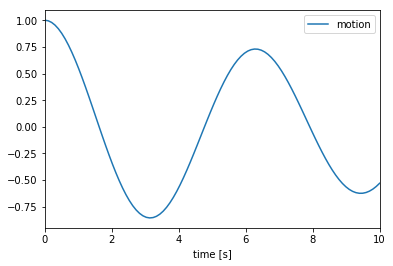

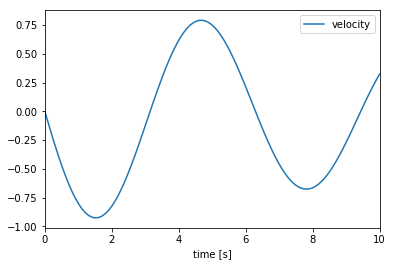

In [65]:
df['motion'] = y[:,0]
df['velocity'] = y[:,1]

fig,ax = plt.subplots()
df.plot(y='motion', ax=ax);
ax.set_xlabel('time [s]')

fig,ax = plt.subplots()
df.plot(y='velocity', ax=ax);
ax.set_xlabel('time [s]')